<a href="https://colab.research.google.com/github/AZhytnyk/DZ_DLA/blob/main/HW1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/yulu_bike_sharing_dataset.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [10]:
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1


In [9]:
df


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

**У мене інша кількість колонок  - 19**


## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


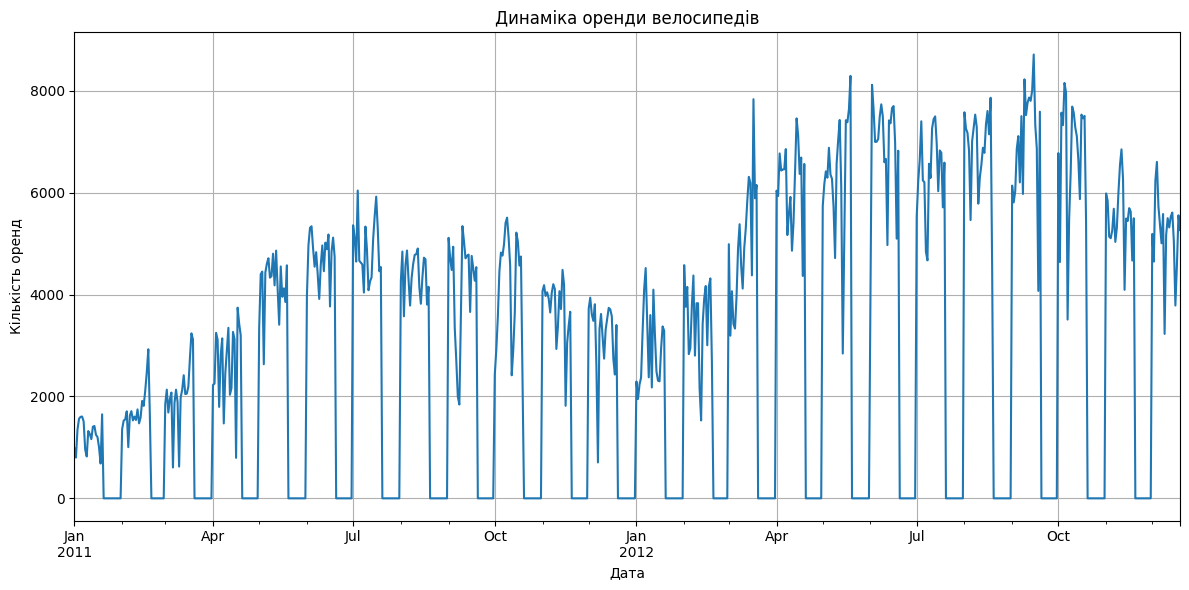

In [7]:
# Групування за датою — сума оренд за день
daily_counts = df['count'].resample('D').sum()

# Побудова графіка
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Динаміка оренди велосипедів')
plt.xlabel('Дата')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

**Інтерпретація**

Причини заломів:

- Низький попит у вихідні чи свята — люди рідше їздять на роботу.
- Погодні умови — дощ, сніг або надто холодна/спекотна погода зменшують кількість оренд.
- Нерівномірність попиту протягом тижня — у будні оренда вища (особливо зранку та ввечері).
- Соціальні або економічні події — наприклад, локдауни, страйки або обмеження.

Загальні тенденції:

Ймовірно, помітне зростання оренди навесні та влітку, коли тепліше.
У будні дні оренда може бути вищою — люди користуються велосипедами як транспортом на роботу.
У святкові та вихідні дні можливе зниження попиту, особливо якщо погода несприятлива.

Сезонність типова:

Збільшення оренди в теплу пору року (весна, літо).
Зменшення — в осінь і зиму через холод, дощі або сніг.

Аномально високими значеннями (наприклад, під час свят, акцій, марафонів, теплої зими).

Аномально низькими (локдауни, шторми, аварії, вихід з ладу системи прокату, сильні морози).



## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

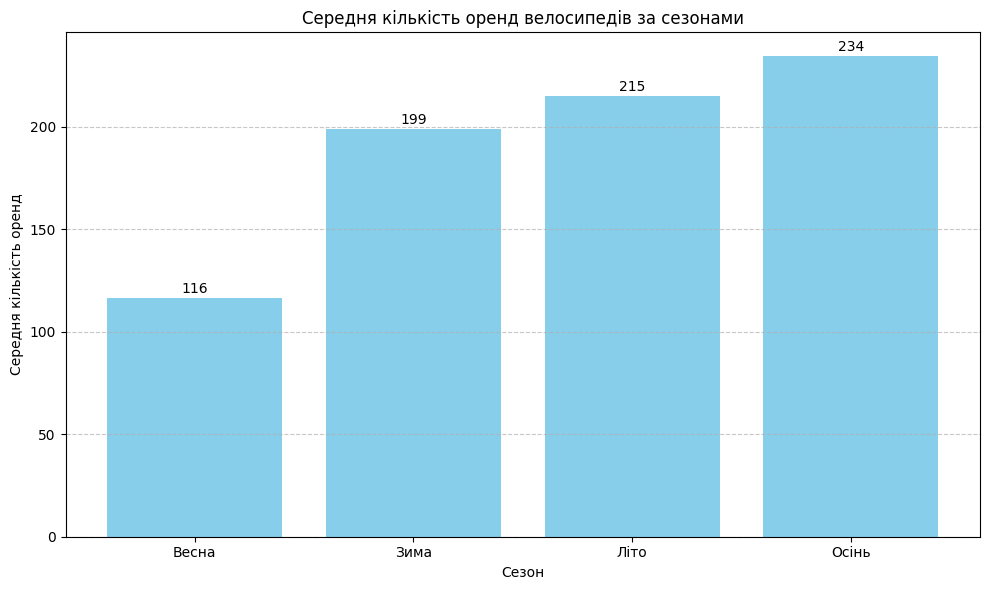

In [11]:
# Мапа сезонів: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

# Обчислення середньої кількості оренд за кожен сезон
seasonal_avg = df.groupby('season_name')['count'].mean().sort_index()

# Побудова графіка
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_avg.index, seasonal_avg.values, color='skyblue')

# Додавання підписів над стовпцями
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.0f}', ha='center', va='bottom')

# Налаштування графіка
plt.title('Середня кількість оренд велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Ось кілька логічних пояснень:

Осінь має комфортну погоду: не надто спекотно, як улітку, і ще не холодно — це ідеальні умови для поїздок на велосипеді.

Початок навчального/робочого сезону у вересні — більше людей їздить на роботу чи в університет.

Влітку більше відпусток, тому хоч оренда і висока, але не максимальна.

Взимку холод та опади знижують попит.

Весна може включати ще холодні або дощові місяці (наприклад, березень).

Восени оренда в середньому в ~2 рази вища, ніж навесні.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


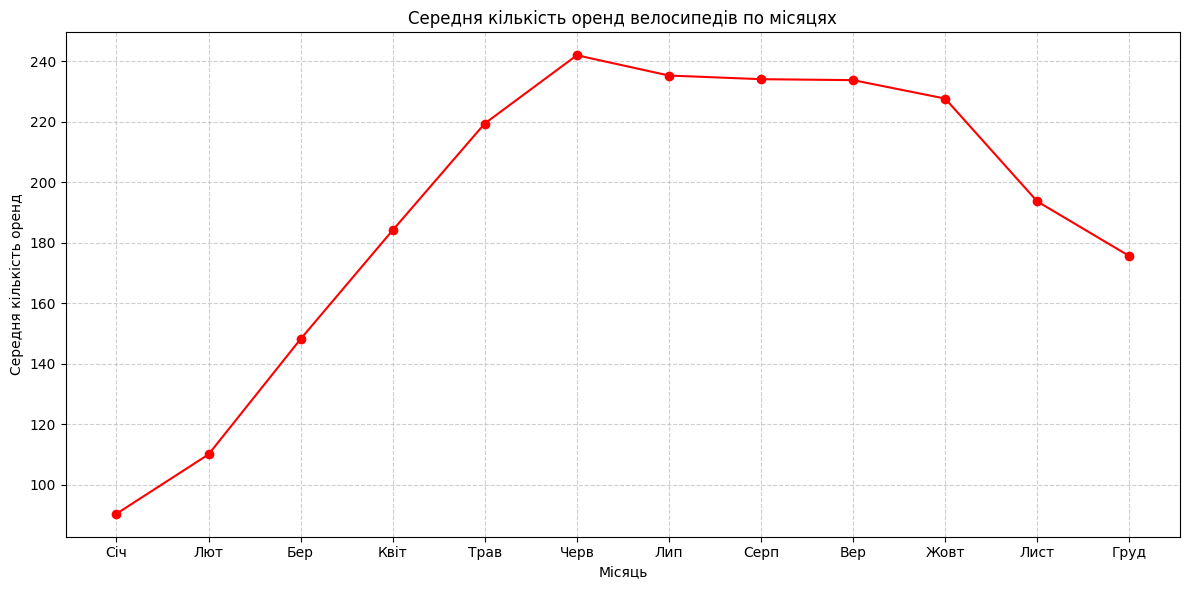

In [12]:
# Групування по місяцях: середнє значення 'count' для кожного місяця
monthly_avg = df.groupby('month')['count'].mean()

# Назви місяців для осі X
month_names = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв', 'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд']

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg.values, color='red', marker='o', linestyle='-')

# Налаштування осей
plt.title('Середня кількість оренд велосипедів по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True, linestyle='--', alpha=0.6)

# Гарантовано 12 чітких поділок по осі X
plt.xticks(ticks=range(12), labels=month_names)

plt.tight_layout()
plt.show()


Пік оренди припадає на червень — тут найвища середня кількість оренд (близько 240).

Спад оренди спостерігається у січні — найнижчі значення (близько 90), а також низькі показники у лютому.

**Чи збігається ця закономірність з результатами з попереднього завдання?**
Так, закономірність збігається.

Раніше ми визначали, що зима (січень-лютий) має найменшу кількість оренд, а тепліші місяці (переважно літні та рання осінь) — найвищу активність.

Червень — це кінець весни/початок літа, коли умови комфортні для їзди.

Осінні місяці (вересень, жовтень) також показують високі значення, хоча на графіку помітне зниження після серпня.

**Вплив клімату:**

Зима (січень-лютий): холодна погода, можливий сніг і лід роблять їзду на велосипеді менш комфортною, тому оренда падає.

Весна (березень-травень): погода стає теплішою, оренда починає зростати.

Літо (червень-серпень): тепла та суха погода створює найкращі умови для їзди, тому спостерігається пік.

Осінь (вересень-жовтень): погода залишається помірною, але з поступовим похолоданням оренда починає знижуватися.

Кінець осені (листопад): охолодження та можливі дощі знижують попит.

Крім того, якщо регіон має сезон дощів (мусон), це теж може впливати на зниження оренди в певні місяці.



## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

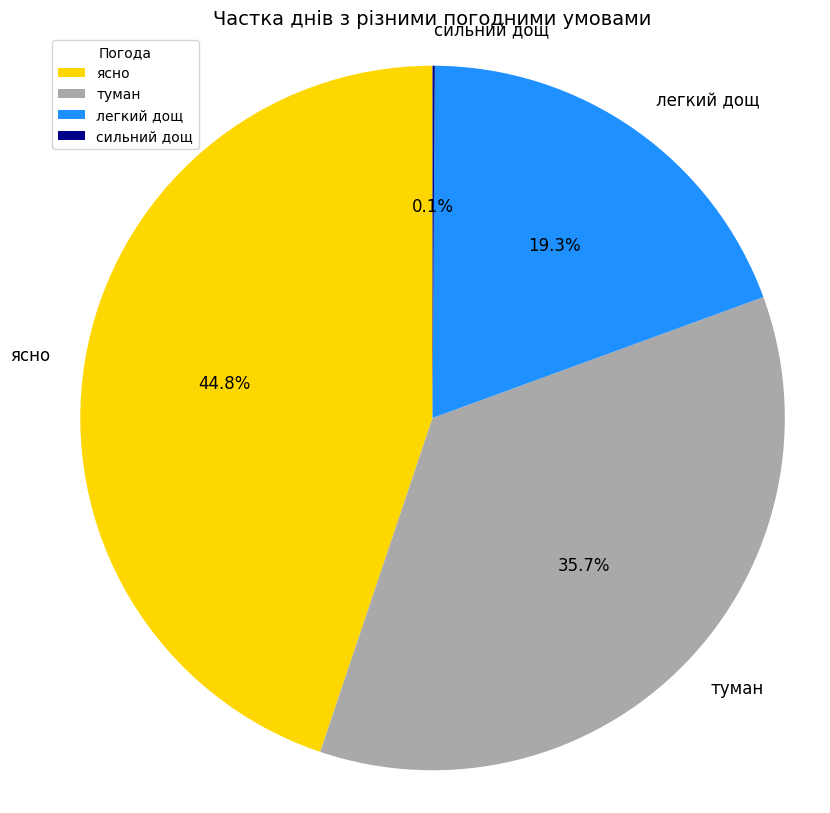

In [15]:
# Відбираємо унікальні дні з відповідними weather (щоб не враховувати повтори в межах дня)
unique_days_weather = df.reset_index()[['date', 'weather']].drop_duplicates()

# Рахуємо кількість днів для кожного типу погоди
weather_counts = unique_days_weather['weather'].value_counts().sort_index()

# Опис категорій погоди
weather_labels = {
    1: 'ясно',
    2: 'туман',
    3: 'легкий дощ',
    4: 'сильний дощ'
}

# Власні кольори
colors = ['#FFD700',  # золото - ясно
          '#A9A9A9',  # темно-сірий - туман
          '#1E90FF',  # синій - легкий дощ
          '#00008B']  # темно-синій - сильний дощ

# Побудова кругової діаграми
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(weather_counts,
                                    labels=[weather_labels[i] for i in weather_counts.index],
                                    colors=colors,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    radius=0.8,
                                    textprops={'color':'black', 'fontsize':12})

# Додаємо легенду
plt.legend(patches, [weather_labels[i] for i in weather_counts.index], title="Погода")

plt.title("Частка днів з різними погодними умовами", fontsize=14)
plt.axis('equal')  # Коло замість еліпса
plt.show()

Очевидно, що переважає ясна погода - 44.8%, а днів із сильним дощем лише 0.1%.

Як вже детально поснюваалось у інтерпретації попередніх графіків, погода має безпосередній вплив на попит сервісу з оренди велосипедів.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

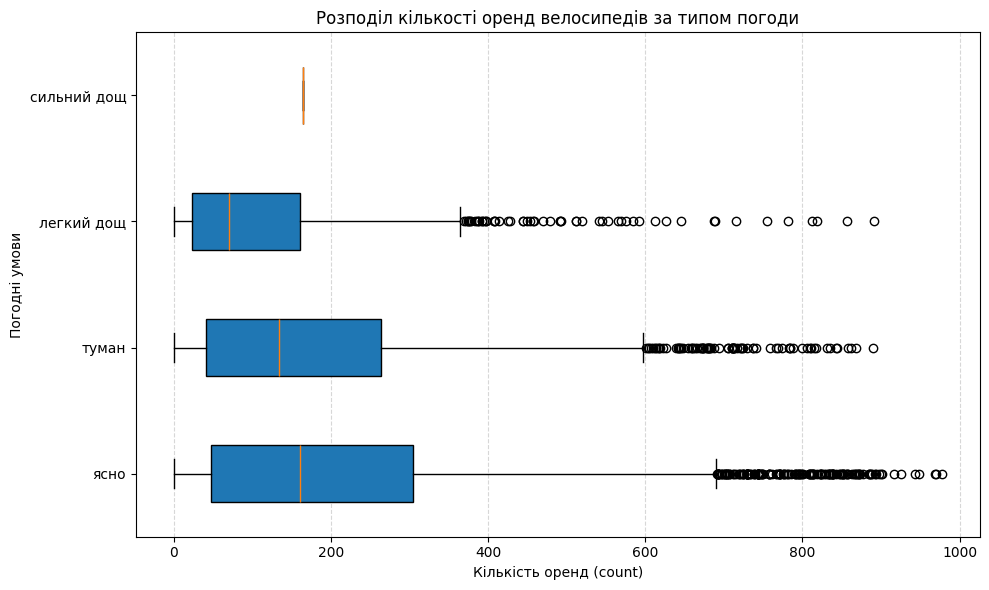

In [18]:
# Підготовка даних: групуємо значення 'count' за категорією 'weather'
weather_labels = {
    1: 'ясно',
    2: 'туман',
    3: 'легкий дощ',
    4: 'сильний дощ'
}

# Створюємо список з масивами кількостей прокатів по кожному типу погоди
box_data = [df[df['weather'] == i]['count'] for i in sorted(weather_labels.keys())]
labels = [weather_labels[i] for i in sorted(weather_labels.keys())]

# Побудова горизонтального box plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_data,
            vert=False,         # горизонтально
            patch_artist=True)  # для зафарбованих коробок

# Додаємо мітки по осі Y
plt.yticks(ticks=range(1, len(labels)+1), labels=labels)

plt.title("Розподіл кількості оренд велосипедів за типом погоди")
plt.xlabel("Кількість оренд (count)")
plt.ylabel("Погодні умови")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Найбільший розкид	- Ясно

Викиди є при всіх типах, особливо ясно і туман

Найвища медіана	- Ясно

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

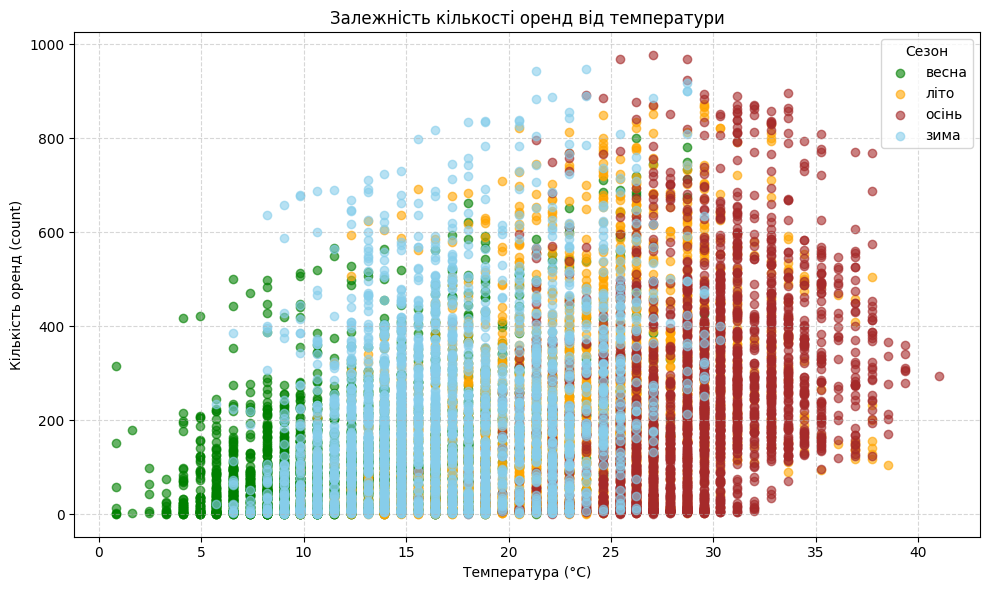

In [19]:
# Кольори для сезонів: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
season_colors = {
    1: 'green',     # весна
    2: 'orange',    # літо
    3: 'brown',     # осінь
    4: 'skyblue'    # зима
}

season_labels = {
    1: 'весна',
    2: 'літо',
    3: 'осінь',
    4: 'зима'
}

plt.figure(figsize=(10, 6))

# Проходимо по сезонах і будуємо по черзі кожну групу точок
for season, color in season_colors.items():
    subset = df[df['season'] == season]
    plt.scatter(subset['temp'], subset['count'],
                label=season_labels[season],
                color=color,
                alpha=0.6)

plt.title("Залежність кількості оренд від температури")
plt.xlabel("Температура (°C)")
plt.ylabel("Кількість оренд (count)")
plt.legend(title="Сезон")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Так, зв'язок є — позитивний, але не лінійний:

При низьких температурах (0–10 °C)
– Кількість оренд низька майже у всіх сезонах.
– Люди рідко орендують велосипеди в холодну погоду.

В діапазоні 15–30 °C
– Найбільша кількість оренд.
– Це оптимальна температура для велопрогулянок — спостерігається пік активності.

Понад 30 °C
– Оренда знижується, хоч і залишається високою.
– Можливо, дуже спекотно для багатьох користувачів — комфорт знижується.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

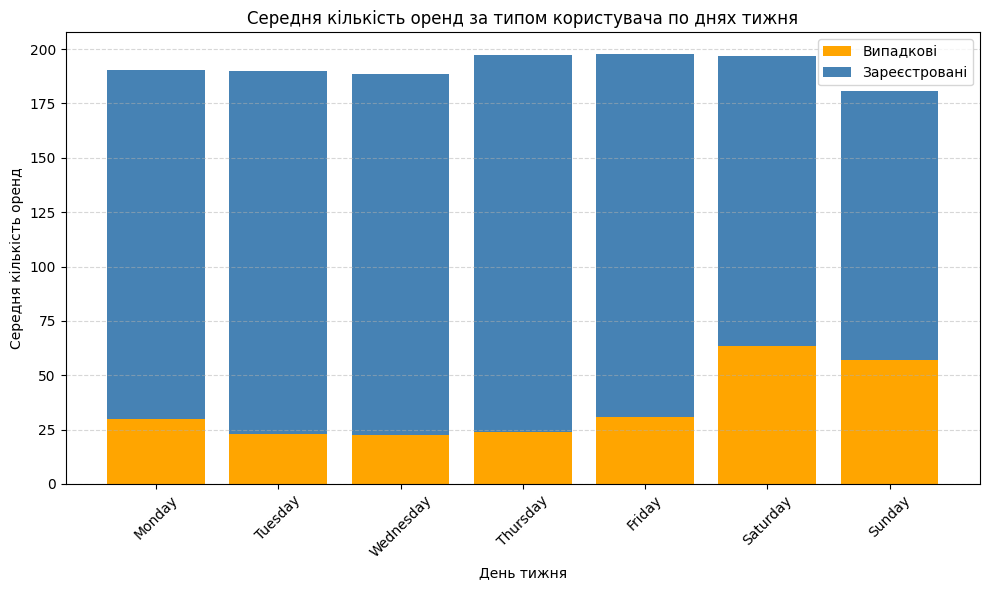

In [20]:
# Групуємо дані: обчислюємо середні значення для кожного дня тижня
avg_by_weekday = df.groupby('weekday')[['casual', 'registered']].mean()

# Переконаємось, що дні тижня в правильному порядку
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_weekday = avg_by_weekday.reindex(weekday_order)

# Побудова stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_by_weekday.index, avg_by_weekday['casual'], label='Випадкові', color='orange')
plt.bar(avg_by_weekday.index, avg_by_weekday['registered'],
        bottom=avg_by_weekday['casual'], label='Зареєстровані', color='steelblue')

# Підпис і стиль
plt.title('Середня кількість оренд за типом користувача по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Зареєстровані клієнти переважно користуються велосипедами у будні, це можна пояснити тим, що вони ними дістаються до роботи.

Помітний зріст у кількості незареєстрованих клієнтів на вихідних можна пояснити тим, що у багатьох бажання орендувати велосипед виникає спонтанно або разово.